Мы – магазин канцтоваров, выбираем поставщика общих тетрадей, которые будут хорошо продаваться и принесут максимум прибыли. Нужно выбрать только 1 поставщика с несколькими 2-3 наименованиями тетрадей.
Какое поставщик будет наиболее перспективным?

отрицательные свойства:
опт. цена, руб.
шероховатость бумаги (1мин-10макс)


In [61]:
#подключаем библиотеку pandas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
file = 'E:/ittensive/Data analytics path/Data processing tasks/2022-04-05.ittensive.010.xlsx'
#Загружаем файл
xl = pd.ExcelFile(file)

#распарсим нужный нам лист файла
data = xl.parse(0)

data = data.groupby('Поставщик').mean()
data.drop('№', inplace = True, axis = 1)

In [49]:
data_positiv =  pd.DataFrame({"плотность бумаги": data["плотность бумаги, г/м2"], "качество обложки": data["качество обложки (1мин-10макс)"], 
                             "кол-во листов": data["кол-во листов"]})
data_negativ =  pd.DataFrame({"шероховатость бумаги": data["шероховатость бумаги (1мин-10макс)"], 
                              "опт. цена, руб.": data["опт. цена, руб."]})

## Отрицательные качества постащиков из таблицы
### 1. шероховатость бумаги
Чем меньше шероховатость (или иначе: чем больше гладкость), тем качественнее и чище печатается картинка

<AxesSubplot:title={'center':'шероховатость бумаги'}, xlabel='Поставщик', ylabel='численное значение'>

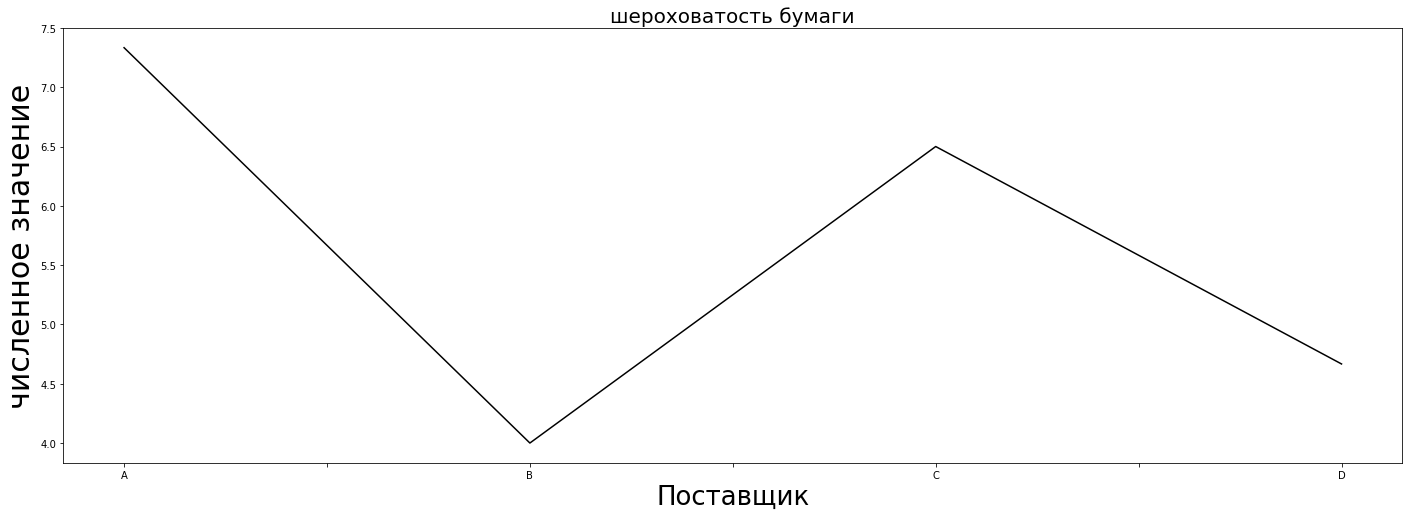

In [36]:
fig = plt.figure(figsize=(24, 8))
area = fig.add_subplot(1, 1, 1)
area.set_title('шероховатость бумаги', fontsize=28)
area.set_ylabel("численное значение", color="black", fontsize=30)
area.set_xlabel("поставщики", fontsize=26, color="black")
numbers = [0,  4]
data_negativ['шероховатость бумаги'].plot.line(ax=area, color='black')
# ЗДЕСЬ САМЫЙ ЛУЧШИЙ ПОКАЗАТЕЛЬ У 'B', САМЫЙ ПЛОХОЙ У A

## 2. Оптовая цена,
чем она выше, тем больше средств приходиться тратить на закупку 

<AxesSubplot:title={'center':'ОПТОВАЯ ЦНЕА, РУБ.'}, xlabel='Поставщик', ylabel='численное значение'>

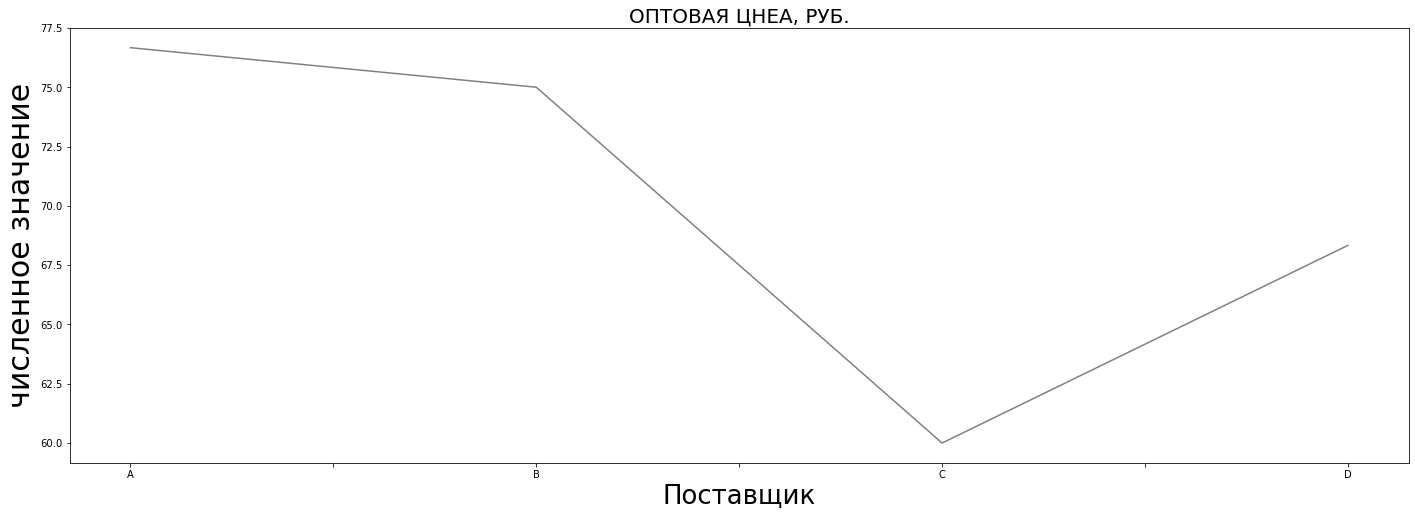

In [43]:
fig2 = plt.figure(figsize=(24, 8))
area = fig2.add_subplot(1, 1, 1)
area.set_title('ОПТОВАЯ ЦНЕА, РУБ.', fontsize=20)
area.set_ylabel("численное значение", color="black", fontsize=30)
area.set_xlabel("поставщики", fontsize=26, color="black")
numbers = [0,  4]
data_negativ['опт. цена, руб.'].plot.line(ax=area, color='grey')

# САМЫЙ ДОРОГИЕ ТЕТРАДИ У ПОСТАВЩИКА 'А', САМЫЕ ДЕШЁВЫЕ У 'С'

# Положительные качества 
## 1. Качества обложки

<AxesSubplot:title={'center':'качество обложки'}, xlabel='Поставщик', ylabel='численное значение'>

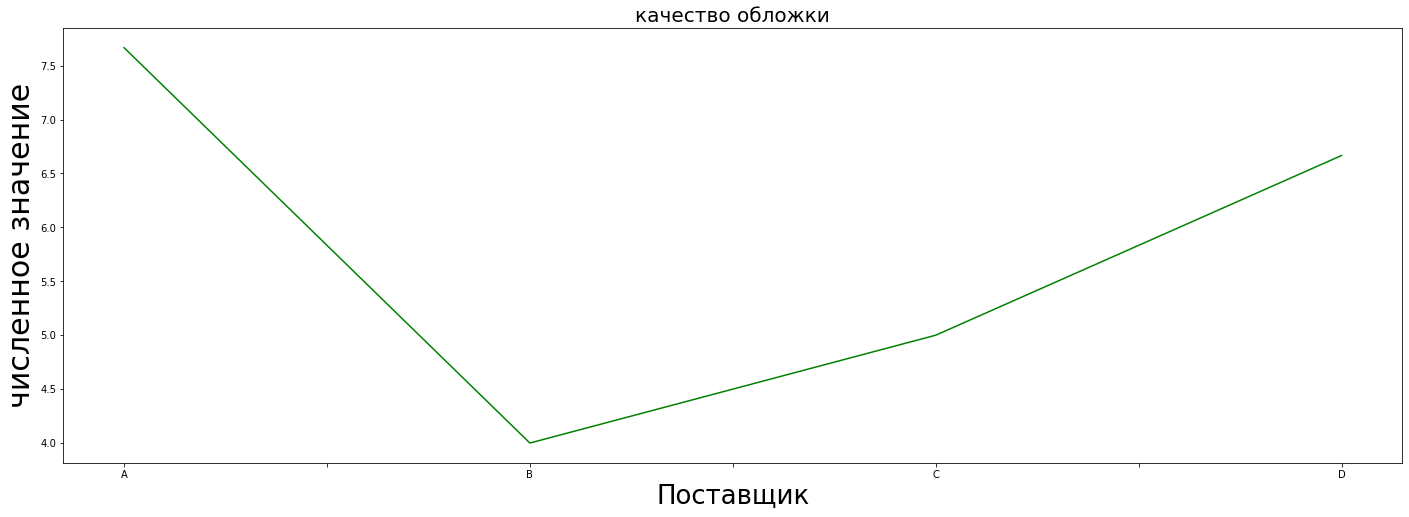

In [44]:
fig = plt.figure(figsize=(24, 8))
area = fig.add_subplot(1, 1, 1)
area.set_title('качество обложки', fontsize=20)
area.set_ylabel("численное значение", color="black", fontsize=30)
area.set_xlabel("поставщики", fontsize=26, color="black")
numbers = [0,  4]
data_positiv['качество обложки'].plot.line(ax=area, color='green')
#САМАЯ КАЧЕТСВАЕННАЯ ОБЛОЖКА У 'A', САМАЯ НЕКАЧЕСТВЕННАЯ У 'В'

## 2. Плотность бумаги
## 3. Кол-во листов

<AxesSubplot:title={'center':'плотность бумаги, кол-во листов'}, xlabel='Поставщик', ylabel='численное значение'>

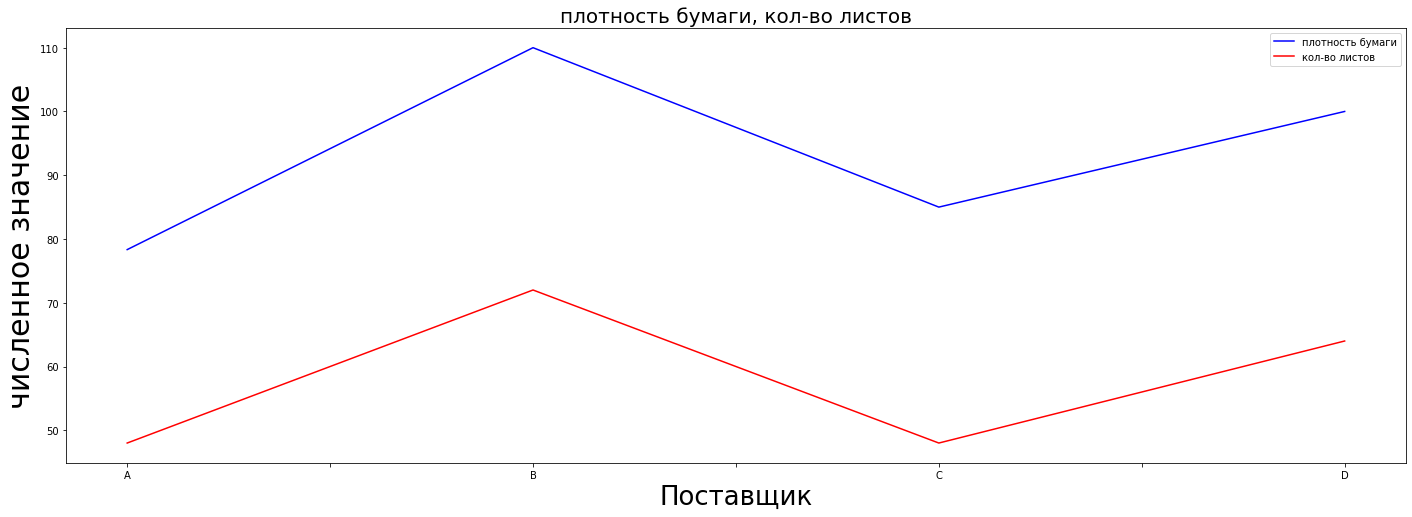

In [50]:
fig = plt.figure(figsize=(24, 8))
area = fig.add_subplot(1, 1, 1)
area.set_title('плотность бумаги, кол-во листов', fontsize=20)
area.set_ylabel("численное значение", color="black", fontsize=30)
area.set_xlabel("поставщики", fontsize=26, color="black")
numbers = [0,  4]
data_positiv_plot = data_positiv.drop('качество обложки', inplace = True, axis = 1)
data_positiv.plot.line(ax=area, color=['blue', 'red'])
#САМАЯ ПЛОТНАЯ БУМАГА И БОЛЬШЕ ВСЕГО ЛИСТОВ У 'В', ХУЖЕ ВСЕГО ПОКАЗАТЕЛИ У 'А'

In [62]:
#подключаем библиотеку pandas
import pandas as pd

#создаём функцию которая будет определять лучшего поставщика
def best_supplier(data):
    coefficient = []
    #удаляем серию данных номер, чтобы она нам не мешала
    data.drop('№', inplace = True, axis = 1)
    #получаем список поставщикоы
    suppliers = data.index
    #обходим его циклом
    for supplier in suppliers:
        #получаем данные одного конкретного поставщика
        supplier_performance = data.loc[supplier]
        #отдельно возьмём отрицательные качества
        #узнаём его среднюю цену на продукцию
        price = supplier_performance['опт. цена, руб.']
        #средний показатель шероховатости бумаги
        roughness =  supplier_performance['шероховатость бумаги (1мин-10макс)']
        #удаляем из фрейма серию данных с ценой и с шероховаттостью
        supplier_performance.drop('опт. цена, руб.',  inplace = True)
        supplier_performance.drop('шероховатость бумаги (1мин-10макс)',  inplace = True)
        #складываем показатели всех параметров
        supplier_performance = supplier_performance.prod()
        #делим сумму параметров на цену, тем самым мы создаё коээфицент, по которому будем оценивать
        coef = supplier_performance / (price * roughness)
        coef = '%.3f' % coef
        #создаём список с коэффицентами
        coefficient.append(float(coef))
    #добавляем серию данных с коэффицентами  в наш фрейм
    data['показатель: параметры / цена'] = coefficient
    #сортируем все данные по коэффиценту
    data = data.sort_values(by = ['показатель: параметры / цена'], ascending=False)
    #выводим поставщика с самым высоким коэффициентом
    return data

#задём путь к файлу с данными
file = 'E:/ittensive/Data analytics path/Data processing tasks/2022-04-05.ittensive.010.xlsx'
#Загружаем файл
xl = pd.ExcelFile(file)

#распарсим нужный нам лист файла
data = xl.parse(0)

#группируем занчения по серии данных поставщик
data = data.groupby('Поставщик').mean()

#с помощью функции выяснем, какой поставщик лучше и выведем показатели всех поставщиков
best_supplier = best_supplier(data)

### Выводим таблицу с показателями, отсортированную по нашему условному индексу качества

In [63]:
best_supplier

,шероховатость бумаги (1мин-10макс),"плотность бумаги, г/м2",качество обложки (1мин-10макс),кол-во листов,"опт. цена, руб.",показатель: параметры / цена
Поставщик,,,,,,
D,4.666667,100.000000,6.666667,64.0,68.333333,133.798
B,4.000000,110.000000,4.000000,72.0,75.000000,105.600
C,6.500000,85.000000,5.000000,48.0,60.000000,52.308
A,7.333333,78.333333,7.666667,48.0,76.666667,51.273


In [56]:
print('лучший поставщик', best_supplier.index[0])

лучший поставщик D
